<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**OÑA QUILLUPANGUI ANGEL ANDRES** <--- CAMBIE POR LOS QUE CORRESPONDA A SUS DATOS

**18-02-2021**

<font color='red'>NO AGREGUE NUEVAS CELDAS, UTILICE ÚNICAMENTE LAS QUE ESTÁN CREADAS</font>


### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dosfunciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [1]:
# Imprimimos el docsting de cada funcion 
import miningscience as msc
help(msc.download_pubmed)
help(msc.mining_pubs)

Help on function download_pubmed in module miningscience:

download_pubmed(keyword)
    Función que utiliza pubmed para dar un listado de articulos relacionadoes entre si mediante un keyword

Help on function mining_pubs in module miningscience:

mining_pubs(tipo, archivo)
    Función donde si la variable tipo es "DP" el resultado es un dataframe con el PMID y el DP_year, si es AU recupera el número de autores (num_auth) por PMID, y si el tipo es "AD" nos da el pais y el numero de autores .



## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador genomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED


```

In [59]:
# Escriba aquí su código para el ejercicio 2 
f = msc.download_pubmed("Ecuador genomics")
import re
n= re.findall(r"PMID- ", f)
print("El numero de articulos es: ", len(n))
c = re.findall(r"\d{8}", f)
print("El PMID del primer articulo es: ", c[0])

El numero de articulos es:  193
El PMID del primer articulo es:  35121084


## Ejercicio 3 [1 punto]
Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [100]:
#Llamamos a la funcion mining pubs 
pub_year = msc.mining_pubs("DP","Ecuador genomics")
pub_authors = msc.mining_pubs("AU","Ecuador genomics")
countries = msc.mining_pubs("AD","Ecuador genomics")

# Muestre los dos primeros y los dos últimos registros de cada dataframe.

print("PRIMEROS DOS Y ULTIMOS REGISTROS")
print()
# countries

print(countries[0:2])
print()
print(countries[67:69])
print()
# pub_authors

print(pub_authors[0:2])
print()
print(pub_authors[191:193])
print()
# pub_year:

print(pub_year[0:2])
print()
print(pub_year[67:69])

PRIMEROS DOS Y ULTIMOS REGISTROS

        pais  numero de autores
0  Argentina                 44
1     Canada                 83

           pais  numero de autores
67  Netherlands                  3
68      MexicoF                  4

       PMID  Numero de autores
0  35121084                 12
1  35120121                 14

         PMID  Numero de autores
191  17187350                  1
192   8661097                  9

       PMID Año de publicación
0                         2022
1  35121084               2022

        PMID Año de publicación
67  32447234               2020
68  32419208               2020


## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


La media es:  2018.1813471502592
La desviación estandar es:  3.1677516094333185


Text(0, 0.5, 'Repeticiones')

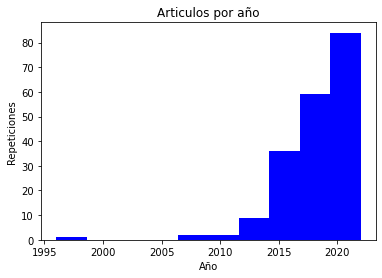

In [101]:
# Escriba aquí su código para el ejercicio 4
# Visualizacion pubyear :
import pandas as pd 
import matplotlib.pyplot as plot
from collections import Counter
pub_year["Año de publicación"] = pub_year["Año de publicación"].astype("int")
mean_py = pub_year["Año de publicación"].mean()
sd_py = pub_year["Año de publicación"].std()
print ("La media es: ", mean_py)
print ("La desviación estandar es: ", sd_py)
#print (pub_year["Año de publicación"])
intervalos = range(min(pub_year["Año de publicación"]), max(pub_year["Año de publicación"]))
plot.hist(x=pub_year["Año de publicación"], color = "blue")
plot.title("Articulos por año")
plot.xlabel("Año")
plot.ylabel("Repeticiones")


Text(0, 0.5, 'Frecuencia')

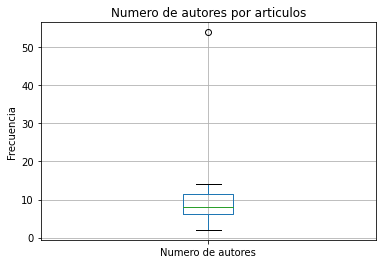

In [117]:
#Visualizacion pub_authors
boxplot = pub_authors[0:10].boxplot(column=["Numero de autores"])
plot.title("Numero de autores por articulos")
plot.ylabel("Frecuencia")

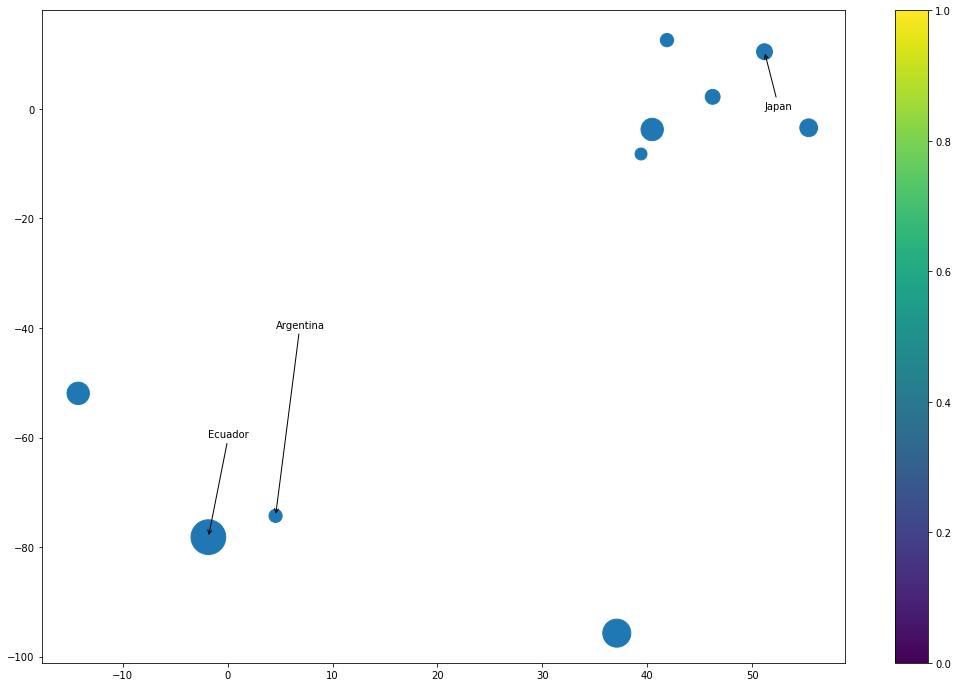

In [112]:
# Visualizacion Countries 
countries = countries.sort_values("numero de autores")

countries_latitud = [39.399872, 4.570868, 41.87194, 46.227638, 51.165691, 55.378051, 
                40.463667, -14.235004, 37.09024, -1.831239  ] 
                 
countries_longitud = [-8.224454, -74.297333, 12.56738, 2.213749, 10.451526, -3.435973,  
                 -3.74922, -51.92528, -95.712891, -78.183406]
repeticiones = [143, 173, 177, 221, 253, 316, 499, 501, 784, 1206]

import matplotlib.pyplot as plot
%matplotlib inline

plot.scatter(countries_latitud, countries_longitud, repeticiones) 
plot.colorbar()
ard = dict(arrowstyle="->")
plot.annotate("Argentina", xy= (4.570868,-74.297333), 
            xytext = (4.570868, -40), arrowprops = ard)
plot.annotate("Ecuador", xy= (-1.831239, -78.183406), 
            xytext = (-1.831239, -60), arrowprops = ard)
plot.annotate("Japan", xy = ( 51.165691,  10.451526), 
             xytext = ( 51.16569,0), arrowprops = ard) 
params = plot.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plot.show()

## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**

En el primer grafico se ve una ausencia de articulos en el intervalo de los años 2000 al 2005, a partir de alli comiencia a aumentar la cantidad de articulos registrando la mayor cantidad en el año 2020.
En el caso del boxplot se puede observar un caso extremo su puntuacion para casos extremos leves pasa de los 50, la mediana es de 8 y la puntacion mas alta de la variable dentro de los casos extemos leves es 13. 

En la visualizacion por paises se obtuvo un intervalo de los 10 primeros paises, donde se encuentra Ecuador con el numero 2, Argentina en el puesto 1 y Japan en el puesto 7

## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

In [123]:
# Escriba aquí su código para el ejercicio 6
from Bio import Entrez 
from Bio import SeqIO
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo
from Bio.Align.Applications import ClustalwCommandline
import os
                                                             

**Escriba aquí la interpretación del árbol**

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Juanito Alimaña ha realizado .....  
```